 All plants and animals need water to survive. There can be no life on earth without water. Why is water so important? Because 60 percent of our body weight is made up of water. Our bodies use water in all the cells, organs, and tissues, to help regulate body temperature and maintain other bodily functions. Because our bodies lose water through breathing, sweating, and digestion, it's crucial to rehydrate and replace water by drinking fluids and eating foods that contain water.

#### Load the data

In [98]:
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter("ignore")


In [99]:
water = pd.read_csv('D:\Dekstop\water_potability.csv')
water.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [100]:
water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [101]:
# Find the null values in the dateset
water.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [102]:
water['Potability']=water['Potability'].astype('category')

In [103]:
#create approve limit for each features based on data available in Google search
cols=water.columns[0:9].to_list()
min_val=[6.52,0,500,0,3,0,0,0,0]
max_val=[6.83,0,1000,4,250,400,2,80,5]
limit=pd.DataFrame(data=[min_val, max_val], columns=cols)

#### Statstical analysis

In [104]:
water.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap ='PuBu')

,count,mean,std,min,25%,50%,75%,max
ph,2785.000000,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.000000,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.000000,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.000000,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.000000,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.000000,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.000000,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.000000,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.000000,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000


In [105]:
#Portability is 1 - means good for Human
water[water['Potability']==1].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='PuBu')

,count,mean,std,min,25%,50%,75%,max
ph,1101.000000,7.073783,1.448048,0.227499,6.179312,7.036752,7.933068,13.175402
Hardness,1278.000000,195.800744,35.547041,47.432000,174.330531,196.632907,218.003420,323.124000
Solids,1278.000000,22383.991018,9101.010208,728.750830,15668.985035,21199.386614,27973.236446,56488.672413
Chloramines,1278.000000,7.169338,1.702988,0.352000,6.094134,7.215163,8.199261,13.127000
Sulfate,985.000000,332.566990,47.692818,129.000000,300.763772,331.838167,365.941346,481.030642
Conductivity,1278.000000,425.383800,82.048446,201.619737,360.939023,420.712729,484.155911,695.369528
Organic_carbon,1278.000000,14.160893,3.263907,2.200000,12.033897,14.162809,16.356245,23.604298
Trihalomethanes,1223.000000,66.539684,16.327419,8.175876,56.014249,66.678214,77.380975,124.000000
Turbidity,1278.000000,3.968328,0.780842,1.492207,3.430909,3.958576,4.509569,6.494249


In [106]:
# Portability is 0 - means not good for Human
water[water['Potability']==0].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdBu')

,count,mean,std,min,25%,50%,75%,max
ph,1684.000000,7.085378,1.683499,0.000000,6.037723,7.035456,8.155510,14.000000
Hardness,1998.000000,196.733292,31.057540,98.452931,177.823265,197.123423,216.120687,304.235912
Solids,1998.000000,21777.490788,8543.068788,320.942611,15663.057382,20809.618280,27006.249009,61227.196008
Chloramines,1998.000000,7.092175,1.501045,1.683993,6.155640,7.090334,8.066462,12.653362
Sulfate,1510.000000,334.564290,36.745549,203.444521,311.264006,333.389426,356.853897,460.107069
Conductivity,1998.000000,426.730454,80.047317,181.483754,368.498530,422.229331,480.677198,753.342620
Organic_carbon,1998.000000,14.364335,3.334554,4.371899,12.101057,14.293508,16.649485,28.300000
Trihalomethanes,1891.000000,66.303555,16.079320,0.738000,55.706530,66.542198,77.277704,120.030077
Turbidity,1998.000000,3.965800,0.780282,1.450000,3.444062,3.948076,4.496106,6.739000


In [107]:
water.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Features ph, Sulfate and Trihalomethanes are having null values. let us check those in details and find option to ha

In [108]:

water[water['Sulfate'].isnull()]
water[water['ph'].isnull()]
water[water['Trihalomethanes'].isnull()]    

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
62,NaN,229.485694,35729.692709,8.810843,384.943779,296.397547,16.927092,NaN,3.855602,0
81,5.519126,168.728583,12531.601921,7.730723,NaN,443.570372,18.099078,NaN,3.758996,0
110,9.286155,222.661551,12311.268366,7.289866,332.239359,353.740100,14.171763,NaN,5.239982,0
118,7.397413,122.541040,8855.114121,6.888689,241.607532,489.851600,13.365906,NaN,3.149158,0
119,7.812804,196.583886,42550.841816,7.334648,NaN,442.545775,14.666917,NaN,6.204846,0
...,...,...,...,...,...,...,...,...,...,...
3174,6.698154,198.286268,34675.862845,6.263602,360.232834,430.935009,12.176678,NaN,3.758180,1
3185,6.110022,234.800957,16663.539074,5.984536,348.055211,437.892115,10.059523,NaN,2.817780,1
3219,6.417716,209.702425,31974.481631,7.263425,321.382124,289.450118,11.369071,NaN,4.210327,1
3259,9.271355,181.259617,16540.979048,7.022499,309.238865,487.692788,13.228441,NaN,4.333953,1


In [109]:
#Fill the null values with the mean values
water['ph']=water['ph'].fillna(water.groupby(['Potability'])['ph'].transform('mean'))
water['Sulfate']=water['Sulfate'].fillna(water.groupby(['Potability'])['Sulfate'].transform('mean'))
water['Trihalomethanes']=water['Trihalomethanes'].fillna(water.groupby(['Potability'])['Trihalomethanes'].transform('mean'))
water.isnull().sum()    

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

## EDA

In [110]:
#Import ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns


0    1998
1    1278
Name: Potability, dtype: int64

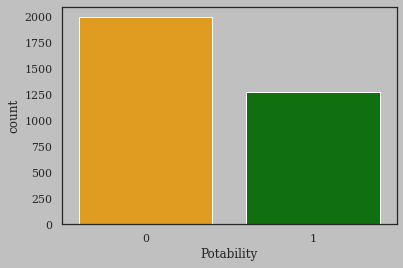

In [111]:
#Lets check the Target features first
sns.countplot(water['Potability'])
water['Potability'].value_counts()



There is imbalance in the Target variable. which should be considered for modeling

In [112]:
limit

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,6.52,0,500,0,3,0,0,0,0
1,6.83,0,1000,4,250,400,2,80,5


<AxesSubplot:>

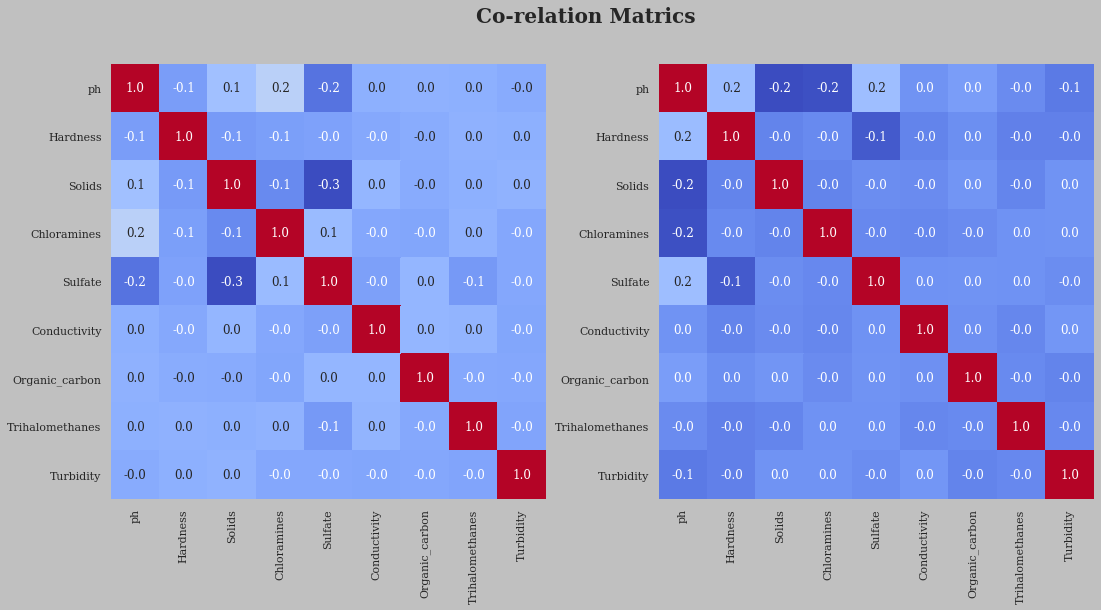

In [113]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(18,8))
plt.suptitle("Co-relation Matrics", size=20, weight='bold')
ax=ax.flatten()
sns.heatmap(water[water['Potability']==1].corr(), annot=True, square=True, fmt='.1f', ax=ax[0], cbar=False, cmap='coolwarm')
sns.heatmap(water[water['Potability']==0].corr(), annot=True, square=True, fmt='.1f', ax=ax[1], cbar=False,cmap='coolwarm')

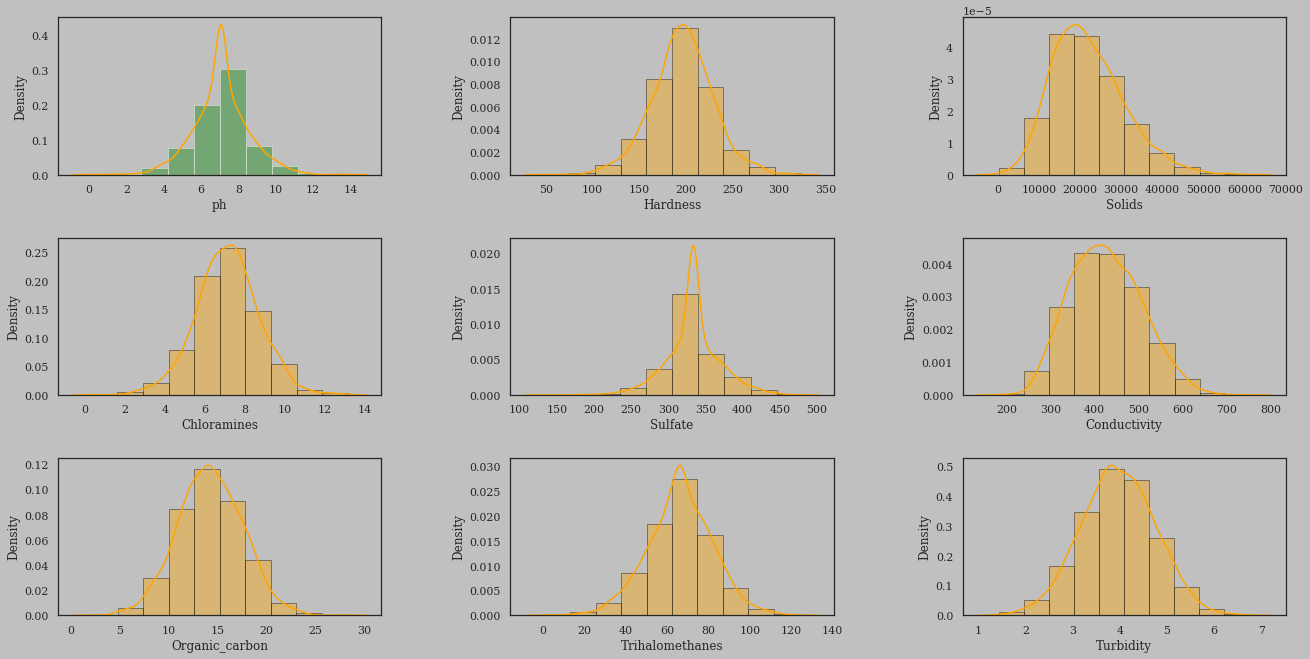

In [114]:

fig = plt.figure(figsize=(22, 11))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(3, 3, 1)
sns.distplot(water['ph'], hist_kws=dict(color='green', linewidth=1), bins=10)
ax = fig.add_subplot(3, 3, 2)
sns.distplot(water['Hardness'], hist_kws=dict(edgecolor='k', linewidth=1), bins=10)
ax = fig.add_subplot(3, 3, 3)
sns.distplot(water['Solids'], hist_kws=dict(edgecolor='k', linewidth=1), bins=10)
ax = fig.add_subplot(3, 3, 4)
sns.distplot(water['Chloramines'], hist_kws=dict(edgecolor='k', linewidth=1), bins=10)
ax = fig.add_subplot(3, 3, 5)
sns.distplot(water['Sulfate'], hist_kws=dict(edgecolor='k', linewidth=1), bins=10)
ax = fig.add_subplot(3, 3, 6)
sns.distplot(water['Conductivity'], hist_kws=dict(edgecolor='k', linewidth=1), bins=10)
ax = fig.add_subplot(3, 3, 7)
sns.distplot(water['Organic_carbon'], hist_kws=dict(edgecolor='k', linewidth=1), bins=10)
ax = fig.add_subplot(3, 3, 8)
sns.distplot(water['Trihalomethanes'], hist_kws=dict(edgecolor='k', linewidth=1), bins=10)
ax = fig.add_subplot(3, 3, 9)
sns.distplot(water['Turbidity'], hist_kws=dict(edgecolor='k', linewidth=1), bins=10)
plt.show()

In [116]:
# View the mean by the response variable

water.groupby('Potability').mean()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
Potability,,,,,,,,,
0,7.085378,196.733292,21777.490788,7.092175,334.56429,426.730454,14.364335,66.303555,3.965800
1,7.073783,195.800744,22383.991018,7.169338,332.56699,425.383800,14.160893,66.539684,3.968328


In [117]:
 # View the mean by the response variable

water.groupby('Potability').std()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
Potability,,,,,,,,,
0,1.545489,31.057540,8543.068788,1.501045,31.941870,80.047317,3.334554,15.642622,0.780282
1,1.343952,35.547041,9101.010208,1.702988,41.865385,82.048446,3.263907,15.971941,0.780842


In [124]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = water.drop(labels=['Potability'], axis=1)
y = water['Potability']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=101)

In [125]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [126]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score

In [128]:
param_grid = {'n_estimators': [100, 200, 300], 'max_features': ['auto', 'sqrt'], 'bootstrap': [True, False], 'criterion':['entropy', 'gini']}
rfcgrid = GridSearchCV(RandomForestClassifier(random_state=101), param_grid, verbose=100, cv=10, n_jobs=-2)
rfcgrid.fit(X_train, y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done   1 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-2)]: Done   2 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-2)]: Done   3 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-2)]: Done   4 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-2)]: Done   5 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-2)]: Done   6 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-2)]: Done   7 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-2)]: Done   8 tasks      | elapsed:   26.3s
[Parallel(n_jobs=-2)]: Done   9 tasks      | elapsed:   26.4s
[Parallel(n_jobs=-2)]: Done  10 tasks      | elapsed:   27.8s
[Parallel(n_jobs=-2)]: Done  11 tasks      | elapsed:   30.5s
[Parallel(n_jobs=-2)]: Done  12 tasks      | elapsed:   30.5s
[Parallel(n_jobs=-2)]: Done  13 tasks      | elapsed:   32.1s
[Parallel(n_jobs=-2)]: Done  14 tasks      | elapsed:  

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=101),
             n_jobs=-2,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['entropy', 'gini'],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [100, 200, 300]},
             verbose=100)

In [129]:
# Best params of Random Forest
rfcgrid.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_features': 'auto',
 'n_estimators': 300}

In [130]:
rfcpredictions = rfcgrid.predict(X_test)

print("Confusion Matrix - Random Forest Using Entropy Index")
print(confusion_matrix(y_test,rfcpredictions))
print("\n")
print("Accuracy Score - Random Forest")
print(accuracy_score(y_test, rfcpredictions))
print("\n")
print("Classification Report - Random Forest")
print(classification_report(y_test,rfcpredictions))
print("\n")
print("F1 Score - Random Forest")
print(f1_score(y_test, rfcpredictions))

Confusion Matrix - Random Forest Using Entropy Index
[[358  44]
 [ 88 166]]


Accuracy Score - Random Forest
0.7987804878048781


Classification Report - Random Forest
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       402
           1       0.79      0.65      0.72       254

    accuracy                           0.80       656
   macro avg       0.80      0.77      0.78       656
weighted avg       0.80      0.80      0.79       656



F1 Score - Random Forest
0.7155172413793103
